In [4]:
import string

import nltk

from nltk.corpus import brown

from gensim.models import Word2Vec

from sklearn.decomposition import PCA

from matplotlib import pyplot


nltk.download("brown")

# Preprocessing data to lowercase all words and remove single punctuation words

document = brown.sents()

data = []

for sent in document:

  new_sent = []

  for word in sent:

    new_word = word.lower()

    if new_word[0] not in string.punctuation:

      new_sent.append(new_word)

  if len(new_sent) > 0:

    data.append(new_sent)
 
# Creating Word2Vec

model = Word2Vec(

    sentences = data,

    size = 50,

    window = 10,

    iter = 20,
)

# Vector for word love

print("Vector for love:")

print(model.wv["love"])

print()

# Finding most similar words

print("3 words similar to car")

words = model.most_similar("car", topn=3)

for word in words:

  print(word)

print()

#Visualizing data

words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]


X = model.wv[words]

pca = PCA(n_components=2)

result = pca.fit_transform(X)


pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):

    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\koyar\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


TypeError: __init__() got an unexpected keyword argument 'size'

: 

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\koyar\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


Vector for love:
[ 0.80839187 -1.460609   -2.2284358  -0.71370924 -0.6991365  -0.08773022
  1.3388726  -1.4108793  -2.837809   -1.761535   -1.6720482  -1.981074
  1.5145912  -1.4746758  -0.6356058  -1.1089545   1.0845265  -0.2461168
  0.18375826 -0.91221184 -2.350703   -0.39397538 -0.6142525   2.669699
 -2.3176954   0.62098396 -1.540315    1.4567702  -0.93072665 -1.3732091
 -1.3577904   2.5828354   0.96651834  0.23112665 -0.99725866  1.8728719
 -0.51807487  0.62120247 -2.5148714   1.6029519  -1.2238734  -2.2172444
  0.49977276  1.6993502   0.9246211  -2.3214955   1.4913373  -4.4988666
 -1.1528038  -0.13127114]

3 words similar to car
('truck', 0.7579865455627441)
('boat', 0.7528508305549622)
('kitchen', 0.7431826591491699)



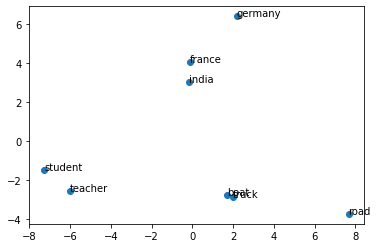

In [2]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

nltk.download("brown")

# データの前処理：すべての単語を小文字にし、一文字の句読点を削除
document = brown.sents()
data = []

for sent in document:
    new_sent = []
    for word in sent:
        new_word = word.lower()
        if new_word[0] not in string.punctuation:
            new_sent.append(new_word)
    if len(new_sent) > 0:
        data.append(new_sent)

# Word2Vec モデルの作成
model = Word2Vec(
    sentences=data,
    vector_size=50,  # size を vector_size に変更
    window=10,
    epochs=20,  # iter を epochs に変更
)

# "love" のベクトル
print("Vector for love:")
print(model.wv["love"])
print()

# "car" に似た3つの単語
print("3 words similar to car")
words = model.wv.most_similar("car", topn=3)

for word in words:
    print(word)
print()

# データの可視化
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]
X = model.wv[words]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
def find_similar_words():
    while True:
        input_word = input("単語を入力してください（終了するには 'exit' と入力）：")
        if input_word == 'exit':
            break
        try:
            similar_words = model.wv.most_similar(input_word, topn=3)
            print(f"'{input_word}' に最も近い単語:")
            for word, similarity in similar_words:
                print(f"{word} (類似度: {similarity:.4f})")
        except KeyError:
            print(f"'{input_word}' はモデルのボキャブラリーに含まれていません。")

find_similar_words()

単語を入力してください（終了するには 'exit' と入力）：apple
'apple' に最も近い単語:
neat (類似度: 0.7746)
pig (類似度: 0.7700)
thick (類似度: 0.7555)
単語を入力してください（終了するには 'exit' と入力）：orange
'orange' に最も近い単語:
green (類似度: 0.8142)
purple (類似度: 0.8122)
marble (類似度: 0.8095)
単語を入力してください（終了するには 'exit' と入力）：^
'^' はモデルのボキャブラリーに含まれていません。


In [ ]:
import numpy as np
def compute_distance_between_words():
    while True:
        word1 = input("最初の単語を入力してください（終了するには 'exit' と入力）：")
        if word1 == 'exit':
            break
        word2 = input("2つ目の単語を入力してください（終了するには 'exit' と入力）：")
        if word2 == 'exit':
            break
        try:
            v1 = model.wv[word1]
            v2 = model.wv[word2]
            cos_sim = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
            distance = 1 - cos_sim
            print(f"'{word1}' と '{word2}' のコサイン距離: {distance:.4f}")
        except KeyError as e:
            print(f"{str(e)} はモデルのボキャブラリーに含まれていません。")

In [ ]:
compute_distance_between_words()